In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#nombre de modalités de chaque variables (dans un dataframe)
def nombre_mod(data2):
    #création d'un dataframe vide
    dff= pd.DataFrame(columns=["VARIABLE","NOMBRE_MOD", "NOMBRE_MOD_SANS_NA"])
    for i in range(data2.shape[1]): # sans compter les valeurs manquantes
        taille =len(data2.iloc[:,i].value_counts(dropna=False))
        taille_1 = len(data2.iloc[:,i].value_counts(dropna=True) )
        dff=dff.append({"VARIABLE": colonnes[i],"NOMBRE_MOD":taille, "NOMBRE_MOD_SANS_NA":taille_1 }, ignore_index=True)
    return dff

In [8]:
# option d'affichage des résultats
#pd.set_option("display.max_row",130)
pd.set_option("display.max_columns",100)

In [9]:
# les noms des variables

colonnes =(["IDENT", "TypeHabi", "GeoFaz_Scl", "GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Anciennete",
            "Logement_prix_m2", "Mediane_RFR", "Sexe", "Prenom_Phase_scl_H", "Prenom_Phase_scl_F",
            "Prenom_Phase_cl_H", "Prenom_Phase_cl_F", "Age_H", "Age_F", "Affinite_1", "Affinite_2",
            "Prenom_effectif", "Potentiel_prenom", "Onoma-Phase_Scl", "Onoma-Phase_CL", "Top_mon"])

In [10]:
#data_orig = pd.read_csv("C:/Users/Christian/Desktop/my_data_FDFIFI19.txt",sep=" " , names = colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data_orig = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/my_data_FDFTOT21.txt", delim_whitespace="\t", header = None, names=colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data_orig
data = data_orig.copy()
data

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,ImmoFaz_Scl,ImmoFaz_cl,Anciennete,Logement_prix_m2,Mediane_RFR,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Affinite_1,Affinite_2,Prenom_effectif,Potentiel_prenom,Onoma-Phase_Scl,Onoma-Phase_CL,Top_mon
0,000000010010000001,02,81,08,91,09,06,21,21,01,71,41,07,04,12,04,20,02,02,01,51,05,1
1,000000020010000006,01,75,07,43,04,06,06,13,02,71,64,07,06,12,09,04,12,04,13,12,01,1
2,000000030010000011,01,76,07,43,04,06,06,16,03,54,81,05,08,07,12,06,06,04,18,36,03,2
3,000000040010000013,03,75,07,43,04,04,06,13,01,71,36,07,03,12,11,11,19,04,06,21,02,1
4,000000050010000015,02,33,03,44,04,06,07,12,01,71,42,07,04,12,05,14,03,03,01,14,01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219994,010928800370109343,01,64,06,82,08,05,16,17,02,71,81,07,08,12,12,21,21,06,21,61,06,NaN
1219995,010928810370109344,03,61,06,64,06,06,14,01,04,44,81,04,08,05,12,01,05,01,03,54,05,NaN
1219996,010928820370109345,02,13,01,42,04,07,07,15,02,71,81,07,08,12,12,21,21,06,21,61,06,NaN
1219997,010928830370109346,02,31,03,82,08,08,16,19,02,71,45,07,04,12,03,02,02,03,01,44,04,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219999 entries, 0 to 1219998
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   IDENT               1219999 non-null  object
 1   TypeHabi            1219999 non-null  object
 2   GeoFaz_Scl          1219999 non-null  object
 3   GeoFaz_cl           1219999 non-null  object
 4   ImmoFaz_Scl         1219999 non-null  object
 5   ImmoFaz_cl          1219999 non-null  object
 6   Anciennete          1219999 non-null  object
 7   Logement_prix_m2    1219999 non-null  object
 8   Mediane_RFR         1219999 non-null  object
 9   Sexe                1219999 non-null  object
 10  Prenom_Phase_scl_H  1219999 non-null  object
 11  Prenom_Phase_scl_F  1219999 non-null  object
 12  Prenom_Phase_cl_H   1219999 non-null  object
 13  Prenom_Phase_cl_F   1219999 non-null  object
 14  Age_H               1219999 non-null  object
 15  Age_F               1219999 non-

In [12]:
(data.isnull()).sum(axis=0)

IDENT                       0
TypeHabi                    0
GeoFaz_Scl                  0
GeoFaz_cl                   0
ImmoFaz_Scl                 0
ImmoFaz_cl                  0
Anciennete                  0
Logement_prix_m2            0
Mediane_RFR                 0
Sexe                        0
Prenom_Phase_scl_H          0
Prenom_Phase_scl_F          0
Prenom_Phase_cl_H           0
Prenom_Phase_cl_F           0
Age_H                       0
Age_F                       0
Affinite_1                  0
Affinite_2                  0
Prenom_effectif             0
Potentiel_prenom            0
Onoma-Phase_Scl             0
Onoma-Phase_CL              0
Top_mon               1092884
dtype: int64

In [13]:
# tableau de corrélation 
tableau_corr =data_sans_nan.iloc[:,1:23].corr()
tableau_corr

NameError: ignored

In [ ]:
# sélection des corrélations les plus importantes
def variables_corr(tableau_corr, seuil):
    variables_corr_pos=[] ; variables_corr_pos_val=[]
    variables_corr_neg=[] ; variables_corr_neg_val=[]
    for i in range(tableau_corr.shape[0]):  
        for j in range(tableau_corr.shape[0]):
            if i<j: #i!=j:
                if (tableau_corr.iloc[i,j] > seuil):
                    variables_corr_pos.append(colonnes[j+1])
                    variables_corr_pos_val.append(round( tableau_corr.iloc[i,j], 2))
                if (tableau_corr.iloc[i,j] <-seuil):
                    variables_corr_neg.append(colonnes[j+1])
                    variables_corr_neg_val.append(round( tableau_corr.iloc[i,j], 2))

        if (len(variables_corr_pos) > 0) | (len(variables_corr_neg) >0) :
            print("variable : ", colonnes[i+1])
            if len(variables_corr_pos) > 0:    
                print("corr pos", variables_corr_pos)
                print("corr pos", variables_corr_pos_val)
            if len(variables_corr_neg) >0:  
                print("corr neg", variables_corr_neg)
                print("corr neg", variables_corr_neg_val)
            print("")
        variables_corr_pos = variables_corr_pos*0
        variables_corr_neg = variables_corr_pos*0

        variables_corr_pos_val = variables_corr_pos_val*0
        variables_corr_neg_val = variables_corr_pos_val*0
        
# élimination des variables trop corrélées (choix manuel)
def elimination_val_corr(data):
    data = data.drop(columns=["GeoFaz_cl","Prenom_Phase_cl_H","Prenom_Phase_cl_F"])
    return data
          

In [ ]:
# corrélations les plus importantes 
variables_corr(tableau_corr, seuil=0.95)

In [ ]:
# Comme il n'y a pas de valeurs manquantes, le seul traitement qu'on fait c'est tranformer
# le type de variable (les variables continues deviennent qualitatives)
def data_processing(df):
    """ 
    for i in range(0,len(df.columns)):    
        df[df.columns[i]].fillna(100.0, inplace=True) #On remplace les données manquantes par 100
    for i in range(0,len(df.columns)):
        print(df[df.columns[i]].value_counts(dropna=False))    
    """
    
   #Transformation de toutes les variables en facteurs         
    for i in range(0,len(df.columns)):
        df[df.columns[i]] = df[df.columns[i]].astype('category')
    return df.to_numpy() 


In [ ]:
data = data_sans_nan

In [ ]:
# numéro correspondant à la dernière colonne
nb_var = data.shape[1] - 1

# encodage Onehot
encodage = OneHotEncoder()  
encodage.fit(data_processing(data.iloc[:,1:nb_var]))  

#train_X = (encodage.transform(data_processing(data.iloc[:,1:nb_var])).toarray()).astype('float32')
### train_Y = np.asanyarray(data.iloc[:,nb_var]).astype('float32')

#input_size = train_X.shape[1] # ca sert pas ici
#train_Y[train_Y == 2.] = 0. # ligne inutile

In [23]:

def evaluation(model, X_train, y_train, X_test, y_test, scoring):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("test set : ")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred)) 
    print("train set : ")
    print(confusion_matrix(y_train, model.predict(X_train))) # ajouter 
    print(classification_report(y_train, model.predict(X_train) ))

    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 4,shuffle=True, scoring = scoring, train_sizes = np.linspace(0.1, 1, 6) )
    print(N)
    print(train_score.mean(axis=1))
    plt.figure(figsize = (10,6))
    plt.plot(N, train_score.mean(axis=1), label ="train_score")
    plt.plot(N, val_score.mean(axis=1), label ="cross_validation_score")

    plt.legend()

    
def quarantiles(model, data_orig, affichage, save, path):
    # position de la dernière variable explicative dans le dataset
    nb_var = data_orig.shape[1]-1
    
    # predict sur tous les individus (avec et sans classe IFI+)
    tous_probas = model.predict_proba(data_orig.iloc[:,1:nb_var])
    df_tous = pd.DataFrame({'IDENT': data_orig.iloc[:,0] , 'PROBA': tous_probas[:,0] })
    #df_tous

    # valeurs ordonnées pour diviser après
    df_tous=df_tous.sort_values(by='PROBA', ascending=True)
    #df_tous

    # vérification
    print(df_tous['PROBA'].value_counts())
    
    # quarantiles
    df_temp =pd.DataFrame( pd.qcut(df_tous['PROBA'],q= 20)  )
    # ajout par index (IMPORTANTE)
    df_tous["TRANCHES"]=pd.DataFrame(df_temp.iloc[:,0].to_numpy(),index= df_temp.index)
    #df_tous

    # pour la colonne IFI+ :
    # remplissage de la dernière colonne par 2 (VALABLE QUE POUR CE DATA, MODIFIER POUR D'AUTRES)
    data_temp_t = data_orig.copy()
    # remplacement
    data_temp_t["Top_mon"] =  data_temp_t["Top_mon"].replace(1.0,'1')
    data_temp_t["Top_mon"] =  data_temp_t["Top_mon"].replace(2.0,'2')
    data_all_complet_class = data_temp_t.fillna('2')
    #data_all_complet_class

    # jointure
    ident_class_tous = data_all_complet_class[["IDENT","Top_mon"]]
    tableau_resultats = pd.merge(df_tous,ident_class_tous)
    #tableau_resultats

    # tranches finales
    tab_cross_temp = pd.crosstab(tableau_resultats["TRANCHES"],tableau_resultats["Top_mon"])    
    
    # création d'une colonne total
    tab_cross_temp["TOTAL"]=tab_cross_temp["1"]+tab_cross_temp["2"]
    
    # affichage
    if affichage ==True:        
        print(tab_cross_temp)
    
    # création du tableau final en éliminant la colonne 2
    tab_pour_excel = tab_cross_temp.drop(["2"], axis=1)
    
    # enregistrement sous Excel
    if save == True:
        tab_pour_excel.to_excel(path)

     

In [ ]:
##############################################################################################################
#                                                   PREMIERS TESTS
##############################################################################################################


In [ ]:
##########################################
# AVEC VARIABLES DONS ET ENCODAGE DUMMIES
##########################################

# test predict individus sans classe
data = data_orig.copy()

# encodage Onehot sur toutes les données (on évite ainsi les erreurs futures)
nb_var = data.shape[1] - 1
data_1_22 = pd.get_dummies(data.iloc[:,1:(data.shape[1]-1)], columns=data.columns[1:(data.shape[1]-1)] )
data_var_qualitatives_temp =  pd.concat([data["IDENT"], data_1_22, data["Top_mon"]], axis=1)
data = data_var_qualitatives_temp
#encodage = OneHotEncoder()
#encodage.fit(data_processing(data.iloc[:,1:nb_var]))

# élimination des individus n'ayant pas de valeur pour la varialbe IFI+
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

# base de données avec des variables corrélées et avec encodage OneHot
data =data_sans_nan

nb_var = data.shape[1] - 1
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
model_reg_logistic = LogisticRegression(random_state =0, max_iter= 10000, class_weight="balanced" )

param = {'C':[0.01,0.05,0.1,0.5,1,2], 'solver': ['liblinear','newton-cg', 'lbfgs']} # avec penalty l1 et l2

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall', n_jobs=-1 )
resultat_reg_logistic = grid_reg_logistic.fit(train_X_s, train_Y_s)
print(resultat_reg_logistic.best_params_)

param = {'solver': ['newton_cg','lbfgs'], 'penalty':['none']} # sans penalty

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall' )
resultat_reg_logistic = grid_reg_logistic.fit(train_X_s, train_Y_s)
resultat_reg_logistic.best_params_

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'C': 0.01, 'solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got newton_cg.

  FitFailedWarning)


{'penalty': 'none', 'solver': 'lbfgs'}

In [ ]:
#model_17_cw = LogisticRegression(random_state =0,solver="lbfgs",penalty="none" ,max_iter= 10000, class_weight="balanced")
model_17_cw = LogisticRegression(random_state =0,C=0.01,solver="liblinear", max_iter= 10000, class_weight="balanced")
evaluation(model_17_cw, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall" )

test set : 
[[ 2515  2164]
 [ 7479 13265]]
              precision    recall  f1-score   support

           1       0.25      0.54      0.34      4679
           2       0.86      0.64      0.73     20744

    accuracy                           0.62     25423
   macro avg       0.56      0.59      0.54     25423
weighted avg       0.75      0.62      0.66     25423

train set : 
[[10444  8333]
 [29159 53756]]
              precision    recall  f1-score   support

           1       0.26      0.56      0.36     18777
           2       0.87      0.65      0.74     82915

    accuracy                           0.63    101692
   macro avg       0.56      0.60      0.55    101692
weighted avg       0.75      0.63      0.67    101692



KeyboardInterrupt: ignored

In [ ]:
#model_17_cw = LogisticRegression(random_state =0,solver="lbfgs",penalty="none" ,max_iter= 10000, class_weight="balanced")
model_17_cw = LogisticRegression(random_state =0, C=0.01,solver="liblinear", max_iter= 10000, class_weight="balanced")
model_17_cw.fit(train_X_s,train_Y_s)
quarantiles(model=model_17_cw, data_orig = data, affichage=True,
            save=False, path = "C:/Users/Christian/Desktop/avec_dons_encodage_dummies_logistic_regression.xlsx")

0.917262    49
0.659192    33
0.738044    26
0.765595    24
0.745852    23
            ..
0.362002     1
0.445542     1
0.497898     1
0.646223     1
0.607002     1
Name: PROBA, Length: 97193, dtype: int64
Top_mon            1     2  TOTAL
TRANCHES                         
(0.177, 0.313]   520  5836   6356
(0.313, 0.34]    617  5739   6356
(0.34, 0.36]     672  5684   6356
(0.36, 0.378]    787  5570   6357
(0.378, 0.395]   818  5536   6354
(0.395, 0.411]   843  5513   6356
(0.411, 0.426]   850  5506   6356
(0.426, 0.44]    927  5428   6355
(0.44, 0.455]   1015  5341   6356
(0.455, 0.469]  1027  5329   6356
(0.469, 0.482]  1053  5302   6355
(0.482, 0.497]  1128  5228   6356
(0.497, 0.512]  1228  5128   6356
(0.512, 0.529]  1206  5149   6355
(0.529, 0.547]  1258  5098   6356
(0.547, 0.569]  1443  4913   6356
(0.569, 0.596]  1489  4867   6356
(0.596, 0.637]  1658  4697   6355
(0.637, 0.704]  2068  4288   6356
(0.704, 0.932]  2849  3507   6356


In [ ]:
##########################################
# SANS VARIABLES DONS ET ENCODAGE DUMMIES
#########################################


In [ ]:
# test predict individus sans classe
data = data_orig.copy()

# on élimine les variables dons
data=data.drop(["GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Prenom_Phase_cl_H", "Prenom_Phase_cl_F",
                "Onoma-Phase_Scl", "Onoma-Phase_CL"],axis=1)

# encodage Onehot sur toutes les données (on évite ainsi les erreurs futures)
nb_var = data.shape[1] - 1
data_1_22 = pd.get_dummies(data.iloc[:,1:(data.shape[1]-1)], columns=data.columns[1:(data.shape[1]-1)] )
data_var_qualitatives_temp =  pd.concat([data["IDENT"], data_1_22, data["Top_mon"]], axis=1)
data = data_var_qualitatives_temp
#encodage = OneHotEncoder()
#encodage.fit(data_processing(data.iloc[:,1:nb_var]))

# élimination des individus n'ayant pas de valeur pour la varialbe IFI+
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

# base de données avec des variables corrélées et avec encodage OneHot
data =data_sans_nan

nb_var = data.shape[1] - 1
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
model_reg_logistic = LogisticRegression(random_state =0, max_iter= 10000, class_weight="balanced" )

param = {'C':[0.01,0.1,1], 'solver': ['liblinear','newton-cg', 'lbfgs']} # avec penalty l1 et l2

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall', n_jobs = 2 )
resultat_reg_logistic = grid_reg_logistic.fit(train_X_s, train_Y_s)
print(resultat_reg_logistic.best_params_)

param = {'solver': ['newton_cg','lbfgs'], 'penalty':['none']} # sans penalty

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall', n_jobs=2 )
resultat_reg_logistic = grid_reg_logistic.fit(train_X_s, train_Y_s)
resultat_reg_logistic.best_params_

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'C': 0.01, 'solver': 'newton-cg'}


{'penalty': 'none', 'solver': 'lbfgs'}

In [ ]:
#model_17_cw = LogisticRegression(random_state =0,solver="lbfgs",penalty="none" ,max_iter= 10000, class_weight="balanced")
model_17_cw = LogisticRegression(random_state =0, C=0.01, solver="newton-cg", max_iter= 10000, class_weight="balanced")

evaluation(model_17_cw, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall" )

test set : 
[[ 2545  2134]
 [ 7548 13196]]
              precision    recall  f1-score   support

           1       0.25      0.54      0.34      4679
           2       0.86      0.64      0.73     20744

    accuracy                           0.62     25423
   macro avg       0.56      0.59      0.54     25423
weighted avg       0.75      0.62      0.66     25423

train set : 
[[10420  8357]
 [29252 53663]]
              precision    recall  f1-score   support

           1       0.26      0.55      0.36     18777
           2       0.87      0.65      0.74     82915

    accuracy                           0.63    101692
   macro avg       0.56      0.60      0.55    101692
weighted avg       0.75      0.63      0.67    101692



KeyboardInterrupt: ignored

In [ ]:
#data_var_qualitatives_temp
model_17_cw.fit(train_X_s,train_Y_s)
quarantiles(model=model_17_cw, data_orig= data, affichage=True,
            save=False, path = "C:/Users/Christian/Desktop/sans_dons_encodage_dummies_logistic_regression.xlsx")

0.913447    50
0.654803    33
0.750406    33
0.733709    26
0.738316    23
            ..
0.734021     1
0.506568     1
0.556617     1
0.586337     1
0.337920     1
Name: PROBA, Length: 96552, dtype: int64
Top_mon            1     2  TOTAL
TRANCHES                         
(0.188, 0.319]   535  5821   6356
(0.319, 0.345]   637  5719   6356
(0.345, 0.364]   687  5669   6356
(0.364, 0.382]   766  5590   6356
(0.382, 0.399]   799  5556   6355
(0.399, 0.414]   869  5487   6356
(0.414, 0.428]   850  5505   6355
(0.428, 0.442]   968  5388   6356
(0.442, 0.456]   971  5385   6356
(0.456, 0.47]   1072  5284   6356
(0.47, 0.483]   1009  5346   6355
(0.483, 0.498]  1152  5205   6357
(0.498, 0.512]  1183  5173   6356
(0.512, 0.528]  1228  5126   6354
(0.528, 0.546]  1320  5036   6356
(0.546, 0.566]  1386  4970   6356
(0.566, 0.594]  1496  4859   6355
(0.594, 0.634]  1639  4718   6357
(0.634, 0.699]  2037  4319   6356
(0.699, 0.926]  2852  3503   6355


In [ ]:
####################################################################################
#                                FIN PREMIERS TESTS
####################################################################################

In [ ]:
####################################################################################################
#
#                                        DATA AUGMENTATION
#
####################################################################################################

In [ ]:
##########################################
# AVEC VARIABLES DONS ET ENCODAGE DUMMIES
##########################################

# test predict individus sans classe
data = data_orig.copy()

# encodage Onehot sur toutes les données (on évite ainsi les erreurs futures)
nb_var = data.shape[1] - 1
data_1_22 = pd.get_dummies(data.iloc[:,1:(data.shape[1]-1)], columns=data.columns[1:(data.shape[1]-1)] )
data_var_qualitatives_temp =  pd.concat([data["IDENT"], data_1_22, data["Top_mon"]], axis=1)
data = data_var_qualitatives_temp
#encodage = OneHotEncoder()
#encodage.fit(data_processing(data.iloc[:,1:nb_var]))

# élimination des individus n'ayant pas de valeur pour la varialbe IFI+
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

# base de données avec des variables corrélées et avec encodage OneHot
data =data_sans_nan

nb_var = data.shape[1] - 1
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
import imblearn
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# augmentation des données
tl = SMOTE()
X_resampled, y_resampled = tl.fit_resample(train_X_s[:,:nb_var] , train_Y_s ) 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(np.unique(y_resampled, return_counts=True) )
np.unique(train_Y_s, return_counts = True)


(array([1, 2]), array([82915, 82915]))


(array([1, 2]), array([18777, 82915]))

In [ ]:
model_reg_logistic = LogisticRegression(random_state =0, max_iter= 10000, class_weight="balanced" )

param = {'C':[0.01,0.1,1], 'solver': ['liblinear','newton-cg', 'lbfgs']} #avec penalty l1 et l2

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall', n_jobs = 2 )
resultat_reg_logistic = grid_reg_logistic.fit(X_resampled, y_resampled)
print(resultat_reg_logistic.best_params_)

param = {'solver': ['newton_cg','lbfgs'], 'penalty':['none']} #sans penalty

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall', n_jobs=2 )
resultat_reg_logistic = grid_reg_logistic.fit(X_resampled, y_resampled)
print(resultat_reg_logistic.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'C': 0.01, 'solver': 'newton-cg'}
{'penalty': 'none', 'solver': 'lbfgs'}


test set : 
[[  355  4324]
 [  402 20342]]
              precision    recall  f1-score   support

           1       0.47      0.08      0.13      4679
           2       0.82      0.98      0.90     20744

    accuracy                           0.81     25423
   macro avg       0.65      0.53      0.51     25423
weighted avg       0.76      0.81      0.76     25423

train set : 
[[63832 19083]
 [ 1486 81429]]
              precision    recall  f1-score   support

           1       0.98      0.77      0.86     82915
           2       0.81      0.98      0.89     82915

    accuracy                           0.88    165830
   macro avg       0.89      0.88      0.87    165830
weighted avg       0.89      0.88      0.87    165830

[ 12437  34824  57211  79598 101985 124372]
[0.78205433 0.77649558 0.77570918 0.77531997 0.77432843 0.77491031]


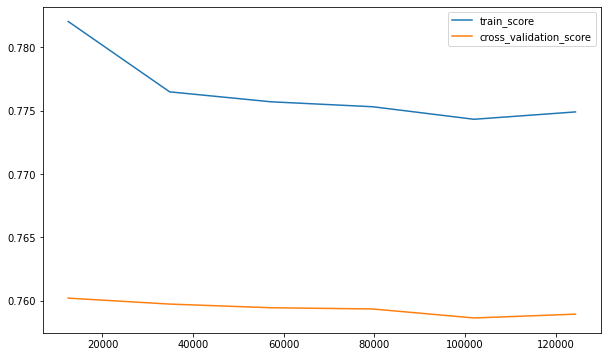

In [ ]:
#model_17_cw = LogisticRegression(random_state =0,C=0.01 , solver="newton-cg", max_iter= 10000, class_weight="balanced")
model_17_cw = LogisticRegression(random_state =0, solver="lbfgs", penalty="none", max_iter= 10000, class_weight="balanced")

evaluation(model_17_cw, X_resampled, y_resampled, test_X_s, test_Y_s, scoring="recall" )

In [ ]:
#####################################################################################
#####################################################################################

In [ ]:
####################################################################################################
#
#                                       UNDER-SAMPLING  ET OVER-SAMPLING
#
####################################################################################################

In [14]:
##########################################
# AVEC VARIABLES DONS ET ENCODAGE DUMMIES
##########################################

# test predict individus sans classe
data = data_orig.copy()

# encodage Onehot sur toutes les données (on évite ainsi les erreurs futures)
nb_var = data.shape[1] - 1
data_1_22 = pd.get_dummies(data.iloc[:,1:(data.shape[1]-1)], columns=data.columns[1:(data.shape[1]-1)] )
data_var_qualitatives_temp =  pd.concat([data["IDENT"], data_1_22, data["Top_mon"]], axis=1)
data = data_var_qualitatives_temp
#encodage = OneHotEncoder()
#encodage.fit(data_processing(data.iloc[:,1:nb_var]))

# élimination des individus n'ayant pas de valeur pour la varialbe IFI+
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

# base de données avec des variables corrélées et avec encodage OneHot
data =data_sans_nan

nb_var = data.shape[1] - 1
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [10]:

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
"""
# dimension du train set
print("Sans aucun traitement sur le train set : " , np.unique(train_Y_s, return_counts=True))

# diminution des données
t2 = TomekLinks()
X_resampled, y_resampled = t2.fit_resample(train_X_s[:,:nb_var] , train_Y_s )
print("Après under-sampling : ", np.unique(y_resampled, return_counts=True ))

# augmentation des données
tl = SMOTE()
X_resampled, y_resampled = tl.fit_resample(X_resampled, y_resampled )
print("Après over-smapling : " , np.unique(y_resampled, return_counts=True ))


# enregistrement du nouveau train set car le traitement du under-sampling prendre du temps 
pd.DataFrame(np.concatenate((X_resampled, y_resampled.reshape((y_resampled.shape[0],1)) ),
                            axis=1)).to_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/val_all_spad_under_over_sampling.txt",
                                            sep=" ", index =False , header = False )
"""


Sans aucun traitement sur le train set :  (array([1, 2]), array([18777, 82915]))


dtype('int64')

In [17]:
# Résultat du traitement sur le train set (under-sampling et over-sampling)
abc_test = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/val_all_spad_under_over_sampling.txt", delim_whitespace="\t", header = None, low_memory=False, dtype="Int64" ) #, dtype='Int64')
abc_np = abc_test.to_numpy(dtype="Int64")

X_resampled = abc_np[:,:-1]
y_resampled = abc_np[:, abc_np.shape[1] -1 ]


In [18]:
X_resampled.shape, y_resampled.shape

((158662, 374), (158662,))

In [21]:
model_reg_logistic = LogisticRegression(random_state =0, max_iter= 10000, class_weight="balanced" )

param = {'C':[0.01,0.1,1], 'solver': ['liblinear','newton-cg', 'lbfgs']} #avec penalty l1 et l2

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall', n_jobs = 2 )
resultat_reg_logistic = grid_reg_logistic.fit(X_resampled, y_resampled)
print(resultat_reg_logistic.best_params_)

param = {'solver': ['newton_cg','lbfgs'], 'penalty':['none']} #sans penalty

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall', n_jobs=2 )
resultat_reg_logistic = grid_reg_logistic.fit(X_resampled, y_resampled)
print(resultat_reg_logistic.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'C': 0.01, 'solver': 'newton-cg'}
{'penalty': 'none', 'solver': 'lbfgs'}


test set : 
[[  569  4110]
 [  702 20042]]
              precision    recall  f1-score   support

           1       0.45      0.12      0.19      4679
           2       0.83      0.97      0.89     20744

    accuracy                           0.81     25423
   macro avg       0.64      0.54      0.54     25423
weighted avg       0.76      0.81      0.76     25423

train set : 
[[61190 18141]
 [ 2663 76668]]
              precision    recall  f1-score   support

           1       0.96      0.77      0.85     79331
           2       0.81      0.97      0.88     79331

    accuracy                           0.87    158662
   macro avg       0.88      0.87      0.87    158662
weighted avg       0.88      0.87      0.87    158662

[ 11899  33318  54738  76157  97576 118996]
[0.78687121 0.77928064 0.77904472 0.77769732 0.77654309 0.77590003]


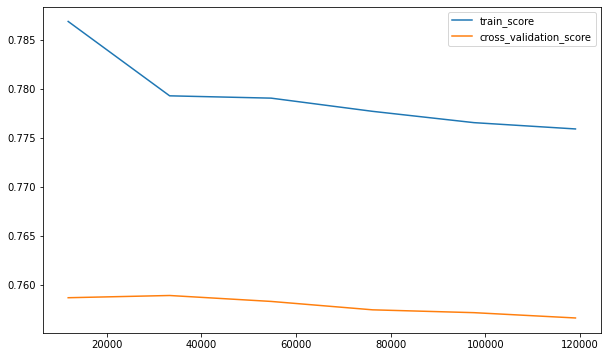

In [25]:
model_17_cw = LogisticRegression(random_state =0,C=0.01 , solver="newton-cg", max_iter= 10000, class_weight="balanced")
#model_17_cw = LogisticRegression(random_state =0, solver="lbfgs", penalty="none", max_iter= 10000, class_weight="balanced")

evaluation(model_17_cw, X_resampled, y_resampled, test_X_s, test_Y_s, scoring="recall" )

In [ ]:
#####################################################################################
###################################################################################
####################################################################################
####################################################################################

In [ ]:
data_1 = data_non_corr[data_non_corr["IFI+"]==1]
data_2 = data_non_corr[data_non_corr["IFI+"]==2]

In [ ]:

probas = model_17.predict_proba( data_non_corr.iloc[:,1:nb_var] ) # *1000 data_1
#Création des quarantiles
d = {'id': data_non_corr.iloc[:,0] , 'proba': probas[:,0]} # data_1
df = pd.DataFrame(data=d)
df.to_excel("C:/Users/Christian/Desktop/test_test.xlsx") 



In [ ]:
df

In [ ]:
somme_quarantiles = pd.DataFrame(data ="-", index=["somme"], columns = ["Tranches de Score","Zone","Eff.", "Pourc.", "Pourc. cumulé"] )


In [ ]:
info_quarantiles = pd.DataFrame(data ="-", index=range(40), columns = ["Tranches de Score","Zone","Eff.", "Pourc.", "Pourc. cumulé"] )


In [ ]:
# prendre uniquement les probalités supérieurs à 50

def remplissage_score_1(probas, taux):

    somme_quarantiles = pd.DataFrame(data ="", index=["somme"], columns = ["Tranches de Score","Zone","Eff.", "Pourc.", "Pourc. cumulé"] )
    info_quarantiles = pd.DataFrame(data ="", index=range(40), columns = ["Tranches de Score","Zone","Eff.", "Pourc.", "Pourc. cumulé"] )

    num = 0
    somme_cum = 0
    dim_qua = info_quarantiles.shape[0]
    val_max = max(probas[:,0])
    val_inter = val_max/40
    val_change = 0

    for k in range(dim_qua) :   
        if k == (dim_qua-1) : 
            somme = ((val_change <=probas[:,0]) & (probas[:,0]<= val_change + val_inter)).sum()
        else :
            somme = ((val_change <=probas[:,0]) & (probas[:,0]< val_change + val_inter)).sum()
            
        if k < (dim_qua/2 - (4+1)) : 
            info_quarantiles.iloc[k,1] = 'R'
        elif k > (dim_qua/2 -(1) ) :
            info_quarantiles.iloc[k,1] = 'V'
        else:
            info_quarantiles.iloc[k,1] = '-'
            
        if k == 0:
            info_quarantiles.iloc[k,0] = str(num)+" - "+str(num+25)
        else :
            info_quarantiles.iloc[k,0] = str(num+1)+" - "+str(num+25)
        
        info_quarantiles.iloc[k,2] = somme
        info_quarantiles.iloc[k,3] = round(somme/probas.shape[0],2)

        somme_cum = somme_cum + info_quarantiles.iloc[k,3]

        info_quarantiles.iloc[k,4] = somme_cum
        num = num + 25
        val_change = val_change + val_inter

    somme_quarantiles.iloc[0,0] = "Ensemble"    
    somme_quarantiles.iloc[0,2] = info_quarantiles.iloc[:,2].sum()
    somme_quarantiles.iloc[0,3] = info_quarantiles.iloc[:,3].sum()
    somme_quarantiles.iloc[0,4] = info_quarantiles.iloc[39,4]

    return info_quarantiles.append(somme_quarantiles)

    
    

In [ ]:
remplissage_score_1(probas, taux=4)


In [ ]:
#####################################################################################
####################################################################################

In [ ]:
#from scipy.stats import kstest
#test_stat = kstest(x, 'norm')